# Implementation step by step of the cluster based shrinkage correlation matrix

In [1]:
import numpy as np
import pandas as pd
import numpy.linalg as LA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
X_matrix = pd.read_csv('./data/sp_500_returns.csv', index_col='Date')
X_matrix = X_matrix[:700]


In [3]:
X_matrix.head()

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,-0.007950,-0.017578,0.023444,0.005374,0.003415,-0.007671,-0.003879,-0.000378,-0.010150,-0.001388,...,-0.017197,-0.006584,-0.010635,0.000233,-0.000283,0.033015,0.006829,-0.013534,-0.007559,0.022063
2012-01-05,0.022382,0.087475,0.006363,0.011102,0.007592,0.008835,-0.002301,-0.019082,0.007072,0.004447,...,-0.010446,0.004418,0.008880,-0.003022,0.000848,-0.014247,0.007631,0.011840,-0.001410,0.028005
2012-01-06,0.010811,0.023766,0.004637,0.010454,0.002598,-0.007116,-0.009047,-0.001733,0.008427,-0.006641,...,-0.035186,-0.002933,-0.006486,-0.007463,-0.005932,-0.016797,0.007237,0.002600,-0.008192,0.001135
2012-01-09,0.026203,0.021429,-0.000280,-0.001586,-0.000518,0.003859,-0.000179,-0.001736,-0.006616,0.019499,...,-0.002805,0.000735,0.021759,0.004464,-0.004831,0.003973,-0.003843,0.007410,-0.004557,0.013605
2012-01-10,0.018760,0.000000,0.000839,0.003580,0.011408,-0.002746,0.004655,0.017201,0.023484,0.004372,...,0.008346,0.008082,0.001825,0.002573,0.014278,0.012267,0.006206,0.020964,0.009156,0.016219


## Obtaining $R$

In [4]:
R_matrix = np.corrcoef(X_matrix.T)

In [5]:
R_matrix

array([[1.        , 0.23858588, 0.29425262, ..., 0.44672096, 0.36486126,
        0.44592377],
       [0.23858588, 1.        , 0.20721532, ..., 0.18887638, 0.16081293,
        0.25687242],
       [0.29425262, 0.20721532, 1.        , ..., 0.27594209, 0.23131785,
        0.2656482 ],
       ...,
       [0.44672096, 0.18887638, 0.27594209, ..., 1.        , 0.32988761,
        0.35291041],
       [0.36486126, 0.16081293, 0.23131785, ..., 0.32988761, 1.        ,
        0.28445445],
       [0.44592377, 0.25687242, 0.2656482 , ..., 0.35291041, 0.28445445,
        1.        ]])

In [6]:
R_matrix.shape

(460, 460)

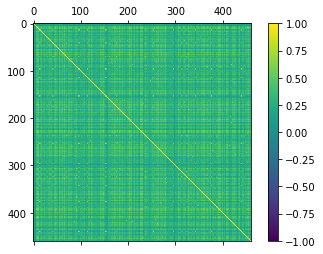

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
subplotsize=[8.,8.]
figuresize=[10.,10.] 
cax = ax.matshow(R_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)

## Getting the distance matrix $D$

In [8]:
D_matrix = 1 - R_matrix

In [9]:
D_matrix

array([[0.00000000e+00, 7.61414124e-01, 7.05747380e-01, ...,
        5.53279042e-01, 6.35138742e-01, 5.54076233e-01],
       [7.61414124e-01, 0.00000000e+00, 7.92784683e-01, ...,
        8.11123623e-01, 8.39187066e-01, 7.43127580e-01],
       [7.05747380e-01, 7.92784683e-01, 0.00000000e+00, ...,
        7.24057913e-01, 7.68682152e-01, 7.34351805e-01],
       ...,
       [5.53279042e-01, 8.11123623e-01, 7.24057913e-01, ...,
        0.00000000e+00, 6.70112387e-01, 6.47089586e-01],
       [6.35138742e-01, 8.39187066e-01, 7.68682152e-01, ...,
        6.70112387e-01, 1.11022302e-16, 7.15545548e-01],
       [5.54076233e-01, 7.43127580e-01, 7.34351805e-01, ...,
        6.47089586e-01, 7.15545548e-01, 0.00000000e+00]])

In [10]:
D_matrix.shape

(460, 460)

## Determining the optimal number of clusters through the eigenvalues of $R$

In [11]:
N = X_matrix.shape[1]
T = X_matrix.shape[0]

In [12]:
N

460

In [13]:
T

700

In [14]:
q = N/T
q

0.6571428571428571

In [15]:
lambda_plus = (1 + np.sqrt(q))**2
lambda_plus

3.278429823898412

Test if the equality in (9) holds:

In [16]:
1+ 2*(np.sqrt(N/T))+ N/T

3.278429823898412

Obtaining the eigenvectors of $R$

In [17]:
lambdas_i = LA.eigvals(R_matrix)

In [18]:
K = np.sum(lambdas_i > lambda_plus)

In [42]:
K

11

## Implementing the clustering algorithm

Notar que se está utilizando la inicialización propuesta por Begusic.

In [20]:
C_kmeans = KMeans(n_clusters=K, random_state=0, init='k-means++').fit(D_matrix)

In [21]:
C_kmeans.labels_

array([ 1,  4,  0,  4,  5,  4,  3,  1,  7,  6,  3,  6,  7,  9,  9, 10,  6,
        1,  7,  1,  0,  1,  0,  5,  1,  1,  0,  6,  3,  6,  3,  0,  5,  0,
        1,  1,  5,  1,  1,  1, 10,  9,  0,  8,  5,  1,  9,  6,  0,  7,  1,
        5,  5,  4,  7,  6, 10,  5,  5,  6,  5,  5,  6,  7,  3,  1,  6,  5,
        5,  6, 10,  6,  3,  5,  1,  6,  0,  1,  3,  5,  5,  1,  5,  5,  3,
        0,  0,  5,  6,  3,  3,  1,  7,  0,  0,  1,  9,  4,  9,  1,  5,  1,
        3,  3,  5,  5,  5,  0,  7,  1,  4,  5,  5,  3,  1,  9,  0,  1,  7,
        1,  4,  0,  5,  6,  6,  7,  5,  0,  8,  0,  6,  5, 10,  5,  9,  2,
        0,  5,  5,  4,  0,  5,  6,  2,  7,  2,  7,  1,  6,  1,  5,  8,  9,
        8,  6,  2,  9,  4,  2,  7,  0, 10,  7,  5,  7,  5,  5,  1,  2,  5,
        1,  6,  1,  5,  1,  5, 10,  0,  1,  6,  0,  3,  6,  5,  7,  4,  5,
        5,  6,  5,  0,  5,  6,  7,  1,  5,  1,  0,  7,  1,  6,  5,  0,  6,
        4,  3,  6,  6,  3,  4,  5,  5,  5,  6,  6,  4,  0,  0,  5,  7,  1,
        7,  5,  4,  4,  5

In [22]:
np.unique(C_kmeans.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32),
 array([59, 79,  9, 40, 29, 81, 65, 57, 10, 17, 14]))

In [23]:
X_matrix = X_matrix.iloc[:,C_kmeans.labels_.argsort()]

In [24]:
R_matrix = np.corrcoef(X_matrix.T)
D_matrix = 1 - R_matrix

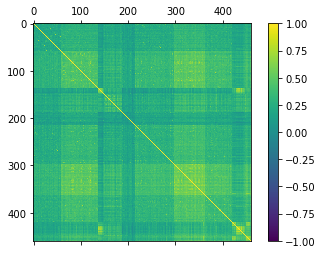

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
subplotsize=[8.,8.]
figuresize=[10.,10.] 
cax = ax.matshow(R_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)

## Creating the S matrix

In [74]:
subset = X_matrix.iloc[:,0:10]

In [28]:
C_kmeans_subset = KMeans(n_clusters=3, random_state=0, init='k-means++').fit(subset.T)

In [39]:
labels = np.array([1,2,2,1,1,1,1,2,0,0])

In [33]:
R_subset = np.corrcoef(subset.T)

In [40]:
labels == 0

array([False, False, False, False, False, False, False, False,  True,
        True])

In [42]:
R_subset

array([[1.        , 0.29372562, 0.29238002, 0.44330183, 0.36852739,
        0.27126391, 0.55321856, 0.56486988, 0.52373052, 0.54664827],
       [0.29372562, 1.        , 0.25589812, 0.22990229, 0.2297495 ,
        0.14386111, 0.20689204, 0.28009811, 0.2030872 , 0.31034029],
       [0.29238002, 0.25589812, 1.        , 0.23750185, 0.29487343,
        0.0836723 , 0.28489801, 0.33681242, 0.25389971, 0.3095806 ],
       [0.44330183, 0.22990229, 0.23750185, 1.        , 0.27638957,
        0.25617966, 0.40905601, 0.46189239, 0.50061912, 0.50249654],
       [0.36852739, 0.2297495 , 0.29487343, 0.27638957, 1.        ,
        0.1566215 , 0.41233841, 0.4133466 , 0.28198528, 0.34533515],
       [0.27126391, 0.14386111, 0.0836723 , 0.25617966, 0.1566215 ,
        1.        , 0.3254793 , 0.24405802, 0.29582659, 0.25284013],
       [0.55321856, 0.20689204, 0.28489801, 0.40905601, 0.41233841,
        0.3254793 , 1.        , 0.52712043, 0.46917622, 0.44162394],
       [0.56486988, 0.28009811, 0.3368124

En este ejempo, los activos pertenecientes al cluster 0 son los 8 y 9. Entonces lo que habría que calcular sería 

$$S_{00} = \frac{1}{|C_p|(|C_p|-1)} (R_{8,9} + R_{9,8})$$

Sin incluir $R_{8,8}$ ni $R_{9,9}$

Calculando manualmente se obtendría

In [70]:
R_subset[9,8]

0.5460432848402861

In [71]:
(1/(2*(2-1)))* (R_subset[8,9] + R_subset[9,8])

0.5460432848402861

Ahora calculando mediante operaciones de matrices y slicing, se confirma que se obtendría lo mismo

In [73]:
i_label = 0
j_label = 0
constante = (1/(2*(2-1)))
constante *(R_subset[labels == i_label][:,labels == j_label] - np.identity(2)).sum()

0.5460432848402861

Para $S_{1,1}$ se tendría entonces, considerando que el índice 0, 3,4,5 y 6 están en ese cluster

$$S_{11} = \frac{1}{|C_1|(|C_1|-1)} (R_{0,3} + R_{0,4} + R_{0,5} + R_{0,6} + R_{3,0} + R_{3,4} + R_{3,5} + R_{3,6} + R_{4,0} + R_{4,3} + R_{4,5} + R_{4,6} + R_{5,0} + R_{5,3} + R_{5,4} + R_{5,6} + R_{6,0} + R_{6,3} + R_{6,4} + R_{6,5})$$

In [74]:
(1/(5*(5-1)))* (R_subset[0,3] + R_subset[0,4] + R_subset[0,5] + R_subset[0,6]+ 
                R_subset[3,0] + R_subset[3,4] + R_subset[3,5] + R_subset[3,6] +
                R_subset[4,0] + R_subset[4,3] + R_subset[4,5] + R_subset[4,6] +
                R_subset[5,0] + R_subset[5,3] + R_subset[5,4] + R_subset[5,6] +
                R_subset[6,0] + R_subset[6,3] + R_subset[6,4] + R_subset[6,5])

0.3472376144138374

In [75]:
i_label = 1
j_label = 1
constante = (1/(5*(5-1)))
constante *(R_subset[labels == i_label][:,labels == j_label] - np.identity(5)).sum()

0.3472376144138373

Se puede observar que se obtiene el mismo resultado,

Ahora para cuando p=0 y q = 2 por ejemplo, se tendría que 8 y 9 pertenecen al cluster 0 y que 1,2, y 7 pertenecen al cluster 2

$$ S_{0,2} = S_{2,0} = \frac{1}{2(2)(3)} R_{8,1} + R_{8,2} + R_{8,7}+ R_{9,1} + R_{9,2} + R_{9,7}$$

Calculando de forma manual:

In [76]:
(1/(2*2*3)) * (R_subset[8,1] + R_subset[8,2] + R_subset[8,7] + 
                R_subset[9,1] + R_subset[9,2] + R_subset[9,7] )

0.1798009682863309

In [105]:
1/(2*2*3)

0.08333333333333333

Y ahora de forma vectorizada

In [80]:
i_label = 0
j_label = 2
constante = (1/(2*2*3))
constante *(R_subset[labels == i_label][:,labels == j_label]).sum()

0.1798009682863309

In [77]:
R_subset[labels == 0]

array([[0.52373052, 0.2030872 , 0.25389971, 0.50061912, 0.28198528,
        0.29582659, 0.46917622, 0.54980916, 1.        , 0.54604328],
       [0.54664827, 0.31034029, 0.3095806 , 0.50249654, 0.34533515,
        0.25284013, 0.44162394, 0.53089467, 0.54604328, 1.        ]])

In [78]:
R_subset[labels == 0][:,labels == 2]

array([[0.2030872 , 0.25389971, 0.54980916],
       [0.31034029, 0.3095806 , 0.53089467]])

Se puede observar que se obtiene el mismo resultado

In [103]:
labels

array([1, 2, 2, 1, 1, 1, 1, 2, 0, 0])

Si fuera p = 0 y q = 1, considerando que p tiene los índices 8 y 9 y q tiene los índices 0, 3,4,5 y 6, entonces se tiene

$$ S_{0,1} = S_{1,0} = \frac{1}{2(2)(5)} R_{8,0} + R_{8,4} + R_{8,4}+ R_{8,5} + R_{8,6} +R_{9,0} + R_{9,4} + R_{9,4}+ R_{9,5} + R_{9,6} $$

In [81]:
np.unique(labels)

array([0, 1, 2])

In [35]:
C_kmeans.labels_.sort()

In [36]:
C_kmeans.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5

In [26]:
def get_s_matrix(R_matrix, labels):
    label, count_label = np.unique(labels, return_counts=True)
    S_matrix = np.zeros((len(label), len(label)))
    for i in label:
        for j in label:
            if i == j:
                constant = 1/(count_label[i]* (count_label[i]-1))
                S_matrix[i,j] = (constant *(R_matrix[labels == i][:,labels == j] - np.identity(count_label[i])).sum())
            else:
                constant = 1/(2* count_label[i]*count_label[j])

                S_matrix[i,j] = (constant *(R_matrix[labels == i][:,labels == j]).sum())
    return S_matrix

In [155]:
S_matrix_subset = get_s_matrix(R_subset, labels)
S_matrix_subset

array([[0.54604328, 0.20801409, 0.17980097],
       [0.20801409, 0.34723761, 0.15029145],
       [0.17980097, 0.15029145, 0.29093622]])

Probando ya la función en los datos reales. 

In [37]:
S_matrix = get_s_matrix(R_matrix,C_kmeans.labels_)
S_matrix

array([[0.20820841, 0.14388227, 0.05954699, 0.10535546, 0.07662282,
        0.12088765, 0.16245171, 0.13273733, 0.08610888, 0.09361783,
        0.12662075],
       [0.14388227, 0.44504812, 0.08813514, 0.14941936, 0.10495256,
        0.17350281, 0.24951439, 0.19526995, 0.11991884, 0.13518199,
        0.18298219],
       [0.05954699, 0.08813514, 0.60511805, 0.13085521, 0.04081031,
        0.06672802, 0.10636234, 0.08958412, 0.16783082, 0.30041667,
        0.17784032],
       [0.10535546, 0.14941936, 0.13085521, 0.33513791, 0.07707034,
        0.12046345, 0.17481213, 0.14155817, 0.13094842, 0.16470993,
        0.16890649],
       [0.07662282, 0.10495256, 0.04081031, 0.07707034, 0.11274351,
        0.0895039 , 0.11719549, 0.09762865, 0.06515966, 0.06307023,
        0.09160592],
       [0.12088765, 0.17350281, 0.06672802, 0.12046345, 0.0895039 ,
        0.28606296, 0.19440732, 0.15744699, 0.0971079 , 0.10456915,
        0.14529698],
       [0.16245171, 0.24951439, 0.10636234, 0.17481213, 0.

## Get $\tilde{R}$ Matrix

Se hace una preuba, notando que se optimizan los for loops dado que la matriz es simétrica y es posible disminuir el número de iteraciones

In [22]:
label, count_label = np.unique(labels, return_counts=True)
R_tilde_matrix = np.zeros((len(labels),len(labels)))
for i in range(len(labels)):
    for j in range(i,len(labels)):
        R_tilde_matrix[i,j] = R_tilde_matrix[j,i] = S_matrix_subset[labels[i], labels[j]]

NameError: name 'labels' is not defined

In [149]:
labels

array([1, 2, 2, 1, 1, 1, 1, 2, 0, 0])

Se puede observar que el resultado es el esperado:

In [164]:
R_tilde_matrix

array([[0.34723761, 0.15029145, 0.15029145, 0.34723761, 0.34723761,
        0.34723761, 0.34723761, 0.15029145, 0.20801409, 0.20801409],
       [0.15029145, 0.29093622, 0.29093622, 0.15029145, 0.15029145,
        0.15029145, 0.15029145, 0.29093622, 0.17980097, 0.17980097],
       [0.15029145, 0.29093622, 0.29093622, 0.15029145, 0.15029145,
        0.15029145, 0.15029145, 0.29093622, 0.17980097, 0.17980097],
       [0.34723761, 0.15029145, 0.15029145, 0.34723761, 0.34723761,
        0.34723761, 0.34723761, 0.15029145, 0.20801409, 0.20801409],
       [0.34723761, 0.15029145, 0.15029145, 0.34723761, 0.34723761,
        0.34723761, 0.34723761, 0.15029145, 0.20801409, 0.20801409],
       [0.34723761, 0.15029145, 0.15029145, 0.34723761, 0.34723761,
        0.34723761, 0.34723761, 0.15029145, 0.20801409, 0.20801409],
       [0.34723761, 0.15029145, 0.15029145, 0.34723761, 0.34723761,
        0.34723761, 0.34723761, 0.15029145, 0.20801409, 0.20801409],
       [0.15029145, 0.29093622, 0.2909362

Se procede entonces a crear la función:

In [28]:
def get_R_tilde(S_matrix, labels):
    label = np.unique(labels)
    R_tilde_matrix = np.zeros((len(labels),len(labels)))
    for i in range(len(labels)):
        for j in range(i,len(labels)):
            R_tilde_matrix[i,j] = R_tilde_matrix[j,i] = S_matrix[labels[i], labels[j]]
    return R_tilde_matrix
    

In [160]:
labels

array([1, 2, 2, 1, 1, 1, 1, 2, 0, 0])

In [161]:
S_matrix_subset

array([[0.54604328, 0.20801409, 0.17980097],
       [0.20801409, 0.34723761, 0.15029145],
       [0.17980097, 0.15029145, 0.29093622]])

Se prueba la función y se comprueba que los resultados son los esperados

In [159]:
get_R_tilde(S_matrix_subset, labels)

array([[0.34723761, 0.15029145, 0.15029145, 0.34723761, 0.34723761,
        0.34723761, 0.34723761, 0.15029145, 0.20801409, 0.20801409],
       [0.15029145, 0.29093622, 0.29093622, 0.15029145, 0.15029145,
        0.15029145, 0.15029145, 0.29093622, 0.17980097, 0.17980097],
       [0.15029145, 0.29093622, 0.29093622, 0.15029145, 0.15029145,
        0.15029145, 0.15029145, 0.29093622, 0.17980097, 0.17980097],
       [0.34723761, 0.15029145, 0.15029145, 0.34723761, 0.34723761,
        0.34723761, 0.34723761, 0.15029145, 0.20801409, 0.20801409],
       [0.34723761, 0.15029145, 0.15029145, 0.34723761, 0.34723761,
        0.34723761, 0.34723761, 0.15029145, 0.20801409, 0.20801409],
       [0.34723761, 0.15029145, 0.15029145, 0.34723761, 0.34723761,
        0.34723761, 0.34723761, 0.15029145, 0.20801409, 0.20801409],
       [0.34723761, 0.15029145, 0.15029145, 0.34723761, 0.34723761,
        0.34723761, 0.34723761, 0.15029145, 0.20801409, 0.20801409],
       [0.15029145, 0.29093622, 0.2909362

Por último, se prueba también la función en los datos reales

In [38]:
R_tilde = get_R_tilde(S_matrix,C_kmeans.labels_)
R_tilde

array([[0.20820841, 0.20820841, 0.20820841, ..., 0.12662075, 0.12662075,
        0.12662075],
       [0.20820841, 0.20820841, 0.20820841, ..., 0.12662075, 0.12662075,
        0.12662075],
       [0.20820841, 0.20820841, 0.20820841, ..., 0.12662075, 0.12662075,
        0.12662075],
       ...,
       [0.12662075, 0.12662075, 0.12662075, ..., 0.60473728, 0.60473728,
        0.60473728],
       [0.12662075, 0.12662075, 0.12662075, ..., 0.60473728, 0.60473728,
        0.60473728],
       [0.12662075, 0.12662075, 0.12662075, ..., 0.60473728, 0.60473728,
        0.60473728]])

## Get $R^\text{clust}$ 

Para obtener $R^{\text{clust}}$, se determina entonces la relación lineal entre $\tilde{R}$ y $R$

In [30]:
def get_R_clust(R_matrix, R_tilde_matrix, alpha):
    if not(0<=alpha and 1>= alpha):
        return np.NaN
    return alpha*R_tilde_matrix + (1-alpha)*R_matrix

In [39]:
R_clust = get_R_clust(R_matrix, R_tilde, 1)
R_clust

array([[0.20820841, 0.20820841, 0.20820841, ..., 0.12662075, 0.12662075,
        0.12662075],
       [0.20820841, 0.20820841, 0.20820841, ..., 0.12662075, 0.12662075,
        0.12662075],
       [0.20820841, 0.20820841, 0.20820841, ..., 0.12662075, 0.12662075,
        0.12662075],
       ...,
       [0.12662075, 0.12662075, 0.12662075, ..., 0.60473728, 0.60473728,
        0.60473728],
       [0.12662075, 0.12662075, 0.12662075, ..., 0.60473728, 0.60473728,
        0.60473728],
       [0.12662075, 0.12662075, 0.12662075, ..., 0.60473728, 0.60473728,
        0.60473728]])

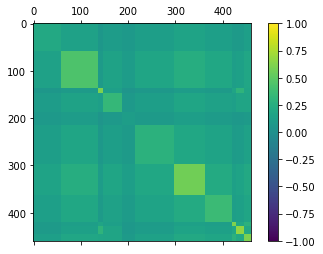

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
subplotsize=[8.,8.]
figuresize=[10.,10.] 
cax = ax.matshow(R_clust, vmin=-1, vmax=1)
fig.colorbar(cax)

<Figure size 720x216 with 0 Axes>

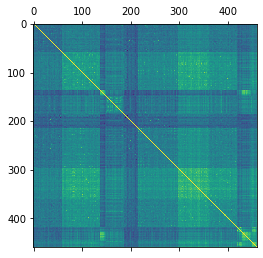

In [41]:
R_clust = get_R_clust(R_matrix, R_tilde, 0)
plt.figure(figsize=(10,3))
plt.matshow(R_clust)
plt.show()

In [33]:
R_clust

array([[0.35584375, 0.35584375, 0.13526335, ..., 0.35584375, 0.35584375,
        0.2124667 ],
       [0.35584375, 0.35584375, 0.13526335, ..., 0.35584375, 0.35584375,
        0.2124667 ],
       [0.13526335, 0.13526335, 0.27297861, ..., 0.13526335, 0.13526335,
        0.14705365],
       ...,
       [0.35584375, 0.35584375, 0.13526335, ..., 0.35584375, 0.35584375,
        0.2124667 ],
       [0.35584375, 0.35584375, 0.13526335, ..., 0.35584375, 0.35584375,
        0.2124667 ],
       [0.2124667 , 0.2124667 , 0.14705365, ..., 0.2124667 , 0.2124667 ,
        0.55124918]])

<Figure size 720x216 with 0 Axes>

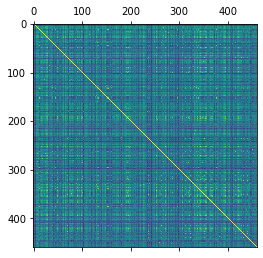

In [53]:
R_clust = get_R_clust(R_matrix, R_tilde, 0)
plt.figure(figsize=(10,3))
plt.matshow(R_clust)
plt.show()